In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 02 15:51:37 2018

@author: Shawnzy
"""
import warnings
warnings.filterwarnings('ignore')
#%% Imports
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 





out = './'
cmap = cm.get_cmap('Spectral') 

cancer = pd.read_hdf('../Input_Data/datasets.hdf','cancer')
cancerX = cancer.drop('diagnosis',1).copy().values
cancerY = cancer['diagnosis'].copy().values

madelon = pd.read_hdf('../Input_Data/datasets.hdf','madelon')        
madelonX = madelon.drop('Class',1).copy().values
madelonY = madelon['Class'].copy().values

cancer_dims = range(2,31)
madelon_dims = range(2,501,2)


<Figure size 432x288 with 0 Axes>

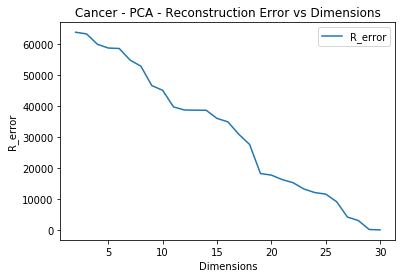

<Figure size 432x288 with 0 Axes>

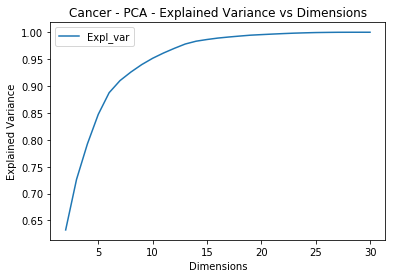

In [2]:
cancer_evals = defaultdict(lambda: defaultdict(dict))
for dim in cancer_dims:
    """Apply the dimensionality reduction algorithms to the two datasets and
    describe what you see."""
    # Apply PCA 
    cscaler = StandardScaler()
    pca = PCA(n_components=dim)
    X = cscaler.fit_transform(cancerX)
    X = pca.fit_transform(X)
    new_cancer = pd.pandas.DataFrame(np.hstack((X,cancerY.reshape(len(X),1))))
    new_cancer.to_hdf(out+'results.hdf','cancer_pca_dim{}'.format(str(dim)),complib='blosc',complevel=9)    
    

    # Describe PCA results
    cancer_evals['Eigvals'][dim] = np.linalg.eigvals(pca.get_covariance())
    cancer_evals['Expl_var'][dim] = sum(pca.explained_variance_ratio_) 
    R = cscaler.inverse_transform(pca.inverse_transform(X))  # Reconstruction
    cancer_evals['R_error'][dim] = sum(map(np.linalg.norm, R-cancerX))

df_cancer = pd.DataFrame(cancer_evals)

df_cancer.to_hdf(out+'results.hdf','cancer_PCA',complib='blosc',complevel=9)

fig = plt.figure()
ax = df_cancer.plot(y='R_error', title="Cancer - PCA - Reconstruction Error vs Dimensions")
ax.set(xlabel="Dimensions", ylabel="R_error")
plt.savefig(out+'Plots/cancer_pca_rerror.png')

fig = plt.figure()
ax = df_cancer.plot(y='Expl_var', title="Cancer - PCA - Explained Variance vs Dimensions")
ax.set(xlabel="Dimensions", ylabel="Explained Variance")
plt.savefig(out+'Plots/cancer_pca_explvar.png')

# fig = plt.figure()
# ax = df_cancer.plot(y='Eigvals', title="Cancer - PCA - EigenValues vs Dimensions")
# ax.set(xlabel="Dimensions", ylabel="Eigvals")
# plt.savefig('./PCA/Plots/cancer_pca_eigenval.png')

<Figure size 432x288 with 0 Axes>

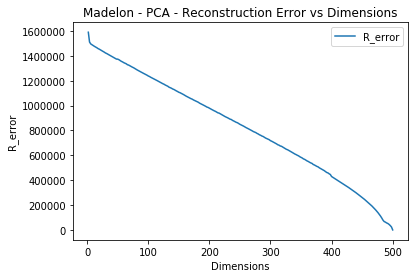

<Figure size 432x288 with 0 Axes>

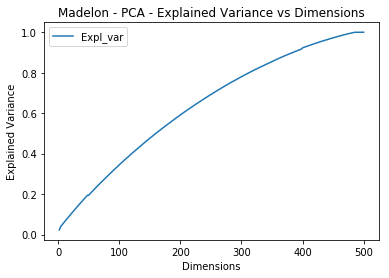

In [3]:
madelon_evals = defaultdict(lambda: defaultdict(dict))
for dim in madelon_dims:
    """Apply the dimensionality reduction algorithms to the two datasets and
    describe what you see."""
    # Apply PCA
    mscaler = StandardScaler()
    pca = PCA(n_components=dim)
    X = mscaler.fit_transform(madelonX)
    X = pca.fit_transform(X)
    new_madelon = pd.pandas.DataFrame(np.hstack((X,madelonY.reshape(len(X),1))))
    new_madelon.to_hdf(out+'results.hdf','madelon_pca_dim{}'.format(str(dim)),complib='blosc',complevel=9)
    

    # Describe PCA results
    madelon_evals['Eigvals'][dim] = np.linalg.eigvals(pca.get_covariance())
    madelon_evals['Expl_var'][dim] = sum(pca.explained_variance_ratio_) 
    R = mscaler.inverse_transform(pca.inverse_transform(X))  # Reconstruction
    madelon_evals['R_error'][dim] = sum(map(np.linalg.norm, R-madelonX))
    
df_madelon = pd.DataFrame(madelon_evals)

df_madelon.to_hdf(out+'results.hdf','madelon_PCA',complib='blosc',complevel=9)

fig = plt.figure()
ax = df_madelon.plot(y='R_error', title="Madelon - PCA - Reconstruction Error vs Dimensions")
ax.set(xlabel="Dimensions", ylabel="R_error")
plt.savefig(out+'Plots/madelon_pca_rerror.png')

fig = plt.figure()
ax = df_madelon.plot(y='Expl_var', title="Madelon - PCA - Explained Variance vs Dimensions")
ax.set(xlabel="Dimensions", ylabel="Explained Variance")
plt.savefig(out+'Plots/madelon_pca_explvar.png')